
Processing Query 1 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter by month
mask = df.index.to_period('M') == '2007-03'
avg_power = df.loc[mask, 'Global_active_power'].mean()

print(avg_power)

plt.show()
1.3186270301754073

Processing Query 2 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter for December 25, 2006
mask = df.index == '2006-12-25'
df_filtered = df.loc[mask]

# Group by hour and sum Global_active_power
grouped = df_filtered.groupby(df_filtered.index.hour)['Global_active_power'].sum().reset_index()

# Find the hour with the highest usage
max_usage_hour = grouped.loc[grouped['Global_active_power'].idxmax()]['index']

print(max_usage_hour)
plt.show()
Execution Error: 'index'

Processing Query 3 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Create a mask for weekend days
df['is_weekend'] = df.index.weekday >= 5

# Group by 'is_weekend' and calculate mean Global_active_power
weekdays_mean

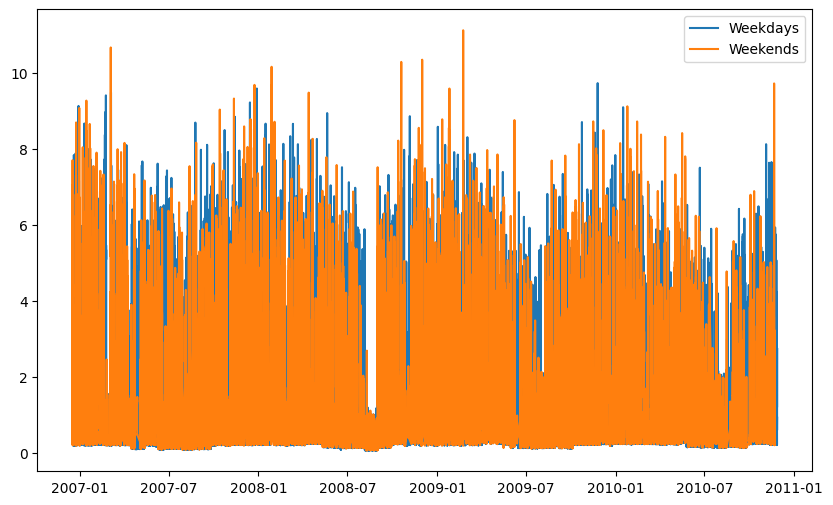


Processing Query 4 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Resample df to daily frequency and sum Global_active_power for each day
daily_sum = df.resample('D').agg({'Global_active_power': 'sum'})

# Create a mask for daily sums exceeding 5 kWh
mask = daily_sum['Global_active_power'] > 5

# Find and print all dates where the daily sum exceeds 5 kWh, along with the corresponding values
print(daily_sum.loc[mask])

# Plot the daily sums
plt.figure(figsize=(10,6))
plt.plot(daily_sum.index, daily_sum['Global_active_power'])
plt.title('Daily Sum of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Sum (kWh)')
plt.show()
            Global_active_power
datetime                       
2006-12-16             1209.176
2006-12-17             3390.460
2006-12-18             2203.826
2006-12-19             1666.194
2006-12-20             2225.748
...                         ...
2010-11-22             2041.536
2010-11-23             1577.536
2010-11-24            

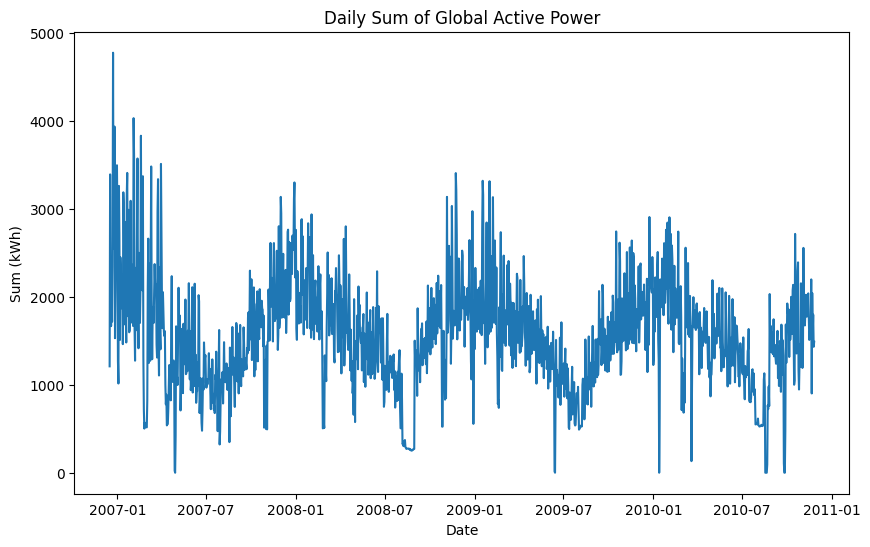


Processing Query 5 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the specified period
mask = (df.index >= '2007-01-01') & (df.index <= '2007-01-07')
df_filtered = df.loc[mask]

# Plot Global_active_power over time
plt.plot(df_filtered.index, df_filtered['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('Global Active Power Over Time (Jan 1-7, 2007)')
plt.show()


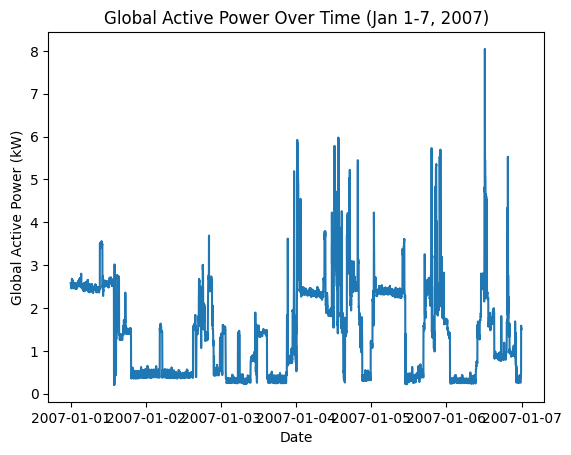


Processing Query 6 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter by date
mask = (df.index >= '2007-02-01') & (df.index <= '2007-02-07')
df_filtered = df.loc[mask]

# Aggregate by day and calculate average Voltage
average_voltage = df_filtered.resample('D').agg({'Voltage': 'mean'})

print(average_voltage)
plt.plot(average_voltage.index, average_voltage['Voltage'])
plt.show()
               Voltage
datetime              
2007-02-01  240.392139
2007-02-02  240.334389
2007-02-03  238.910194
2007-02-04  239.633333
2007-02-05  240.810312
2007-02-06  241.264160
2007-02-07  243.530000


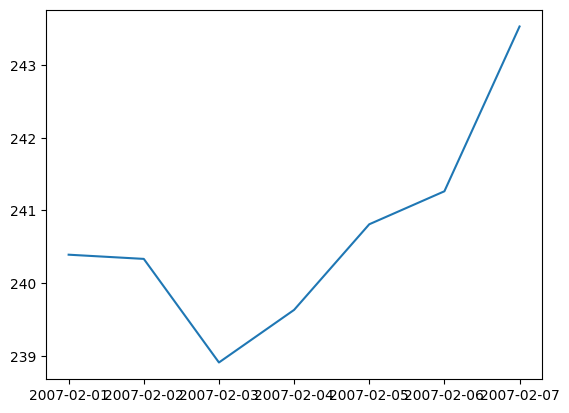


Processing Query 7 
Generated code:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

# Print correlation matrix
print(corr_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()
                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2            

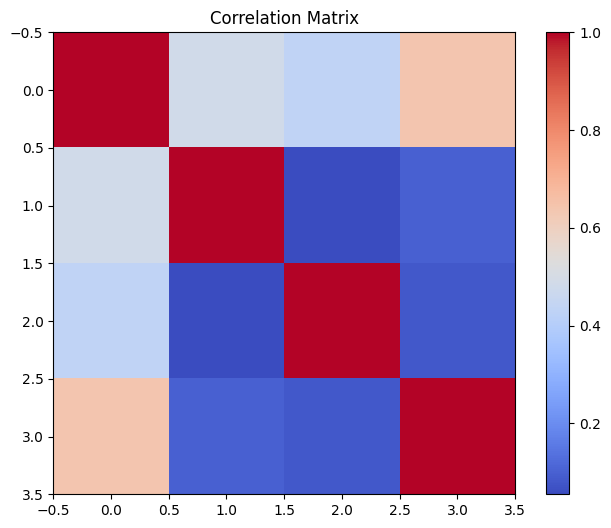


 Evaluation Report 
Query  | Status               | Details
------------------------------------------------------------
1      | Success              | 
2      | Error                | 'index'
3      | Success              | 
4      | Success              | 
5      | Success (plot)       | 
6      | Success              | 
7      | Success              | 


In [ ]:
import pandas as pd
import re
from groq import Groq
import matplotlib.pyplot as plt

# Use this API Key / Change it
client = Groq(api_key=" ")

# Choose Your Model
GROQ_MODEL = "llama-3.1-8b-instant"

# Data Loading 
def load_data():
    df = pd.read_csv(
        'household_power_consumption.txt',
        sep=';',
        dtype={'Date': str, 'Time': str},
        na_values=['?'],
        low_memory=False
    )
    df['datetime'] = pd.to_datetime(
        df['Date'] + ' ' + df['Time'],
        format='%d/%m/%Y %H:%M:%S'
    )
    df = df.drop(columns=['Date', 'Time']).dropna()
    df['Global_active_power'] = df['Global_active_power'].astype(float)
    return df.set_index('datetime')

# LLM Context and Query Template 
DATA_CONTEXT = """
You are working with a pandas DataFrame named df with the following characteristics:
- The index is a pandas DatetimeIndex called 'datetime', created by combining 'Date' and 'Time' columns with format YYYY-MM-DD HH:MM:SS.
- Columns (all floats): Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3.
- Missing values have been dropped.
- Data is sampled at one-minute intervals.

Instructions:
- Use ISO date format (YYYY-MM-DD) for all date filtering with .loc.
- To filter by month, use .loc['YYYY-MM'].
- To aggregate by day, use df.resample('D').agg().
- To find the hour with highest usage, group by df.index.hour.
- For boolean filters, create masks from the same Series/DataFrame you filter.
- Return only valid Python code, no markdown, no explanations.
- For plotting, use matplotlib.pyplot as plt, include plt.show() at the end.
"""

QUERIES = [
    "Calculate and print the single average value of Global_active_power for all rows in March 2007 (not per day, but for the entire month as a single value).",
    "For December 25, 2006, find the hour of the day (0-23) with the highest total Global_active_power usage. Print the hour as an integer.",
    "Add a column 'is_weekend' to df that is True for Saturdays and Sundays, False otherwise. Calculate and print the mean Global_active_power for weekdays and weekends separately.",
    "Resample df to daily frequency and sum Global_active_power for each day. Find and print all dates where the daily sum exceeds 5 kWh, along with the corresponding values.",
    "For the period January 1, 2007 to January 7, 2007, plot Global_active_power over time using matplotlib. Include appropriate axis labels and a title.",
    "For February 1, 2007 to February 7, 2007, calculate and print the average Voltage for each day.",
    "Calculate and print the correlation matrix between Global_active_power and Sub_metering_1, Sub_metering_2, and Sub_metering_3."
]



# Code Cleaning Function 
def clean_code(code):
    
    return re.sub(r"^```.*$", "", code, flags=re.MULTILINE).strip()

# Automated Query Execution and Evaluation 
def automate_queries_evaluation():
    df = load_data()
    results = []
    for idx, query in enumerate(QUERIES, 1):
        print(f"\nProcessing Query {idx} ")
        full_prompt = f"{DATA_CONTEXT}\n\nNow, answer this query:\n{query}"
        try:
            response = client.chat.completions.create(
                model= GROQ_MODEL,
                messages=[{"role": "user", "content": full_prompt}],
                temperature=0.2
            )
            code = clean_code(response.choices[0].message.content)
            print("Generated code:\n", code)
            exec_globals = {'df': df, 'plt': plt, '__builtins__': __builtins__}
            exec_locals = {}
            try:
                exec(code, exec_globals, exec_locals)
                if idx == 5:
                    plt.show()
                    results.append((idx, "Success (plot)", None))
                else:
                    results.append((idx, "Success", None))
            except Exception as e:
                results.append((idx, "Error", str(e)))
                print(f"Execution Error: {e}")
        except Exception as e:
            results.append((idx, "Error (LLM)", str(e)))
            print(f"LLM Error: {e}")

    # Evaluation Report
    print("\n Evaluation Report ")
    print(f"{'Query':<6} | {'Status':<20} | {'Details'}")
    print("-" * 60)
    for idx, status, error in results:
        print(f"{idx:<6} | {status:<20} | {error or ''}")

automate_queries_evaluation()




 Testing Model: gemma2-9b-it 

Processing Query 1 on model gemma2-9b-it 
Generated code:
 df.loc['2007-03']['Global_active_power'].mean()

Processing Query 2 on model gemma2-9b-it 
Generated code:
 df.loc['2006-12-25'].groupby(df.index.hour).sum().Global_active_power.idxmax()
Execution Error: Grouper and axis must be same length

Processing Query 3 on model gemma2-9b-it 
Generated code:
 df['is_weekend'] = df.index.weekday.isin([5, 6])
mean_weekday_power = df[~df['is_weekend']]['Global_active_power'].mean()
mean_weekend_power = df[df['is_weekend']]['Global_active_power'].mean()
print(mean_weekday_power)
print(mean_weekend_power)
1.0354720516747504
1.234232176791304

Processing Query 4 on model gemma2-9b-it 
Generated code:
 df.resample('D').agg({'Global_active_power': 'sum'}).loc[df.resample('D').agg({'Global_active_power': 'sum'}) > 5].index
Execution Error: Cannot index with multidimensional key

Processing Query 5 on model gemma2-9b-it 
Generated code:
 df.loc['2007-01-01':'2007-0

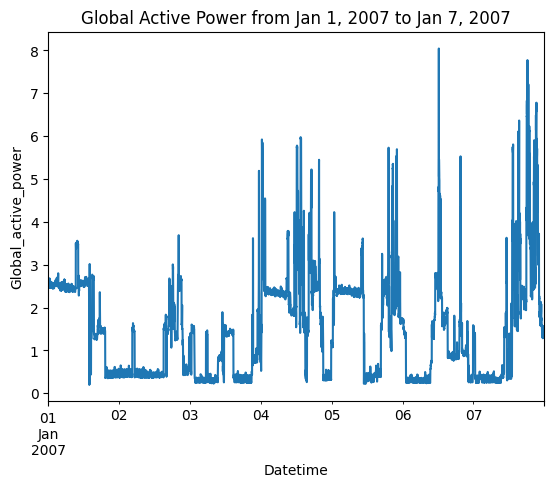


Processing Query 6 on model gemma2-9b-it 
Generated code:
 df.loc['2007-02-01':'2007-02-07'].resample('D').agg({'Voltage': 'mean'})

Processing Query 7 on model gemma2-9b-it 
Generated code:
 df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()


 Testing Model: meta-llama/llama-guard-4-12b 

Processing Query 1 on model meta-llama/llama-guard-4-12b 
Generated code:
 unsafe
S14
Execution Error: name 'unsafe' is not defined

Processing Query 2 on model meta-llama/llama-guard-4-12b 
Generated code:
 unsafe
S14
Execution Error: name 'unsafe' is not defined

Processing Query 3 on model meta-llama/llama-guard-4-12b 
Generated code:
 unsafe
S14
Execution Error: name 'unsafe' is not defined

Processing Query 4 on model meta-llama/llama-guard-4-12b 
Generated code:
 unsafe
S14
Execution Error: name 'unsafe' is not defined

Processing Query 5 on model meta-llama/llama-guard-4-12b 
Generated code:
 safe
Execution Error: name 'safe' is not defined

Processing Q

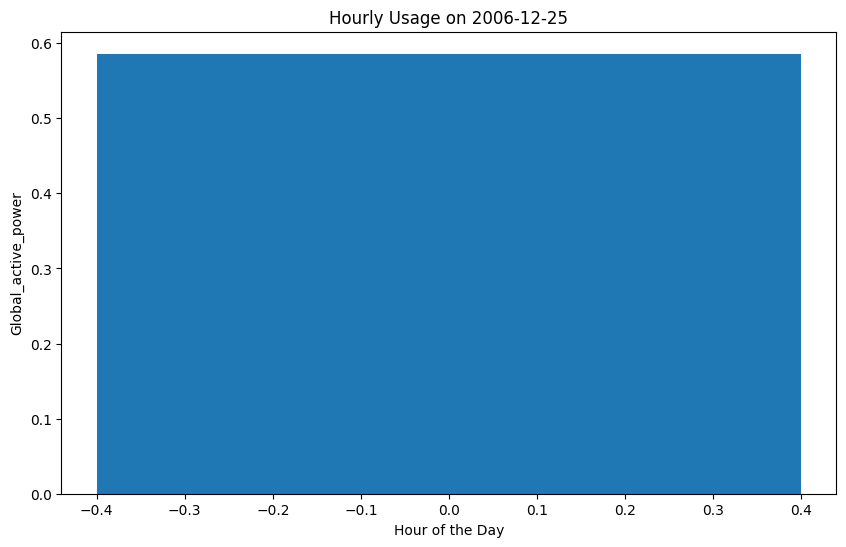


Processing Query 3 on model llama-3.1-8b-instant 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Create a mask for weekends
df['is_weekend'] = df.index.weekday >= 5

# Group by 'is_weekend' and calculate mean Global_active_power
weekdays_mean = df.loc[df['is_weekend'] == False]['Global_active_power'].mean()
weekends_mean = df.loc[df['is_weekend'] == True]['Global_active_power'].mean()

print(f'Mean Global_active_power for weekdays: {weekdays_mean}')
print(f'Mean Global_active_power for weekends: {weekends_mean}')

# Plot Global_active_power for weekdays and weekends
plt.figure(figsize=(10,6))
plt.plot(df.loc[df['is_weekend'] == False]['Global_active_power'], label='Weekdays')
plt.plot(df.loc[df['is_weekend'] == True]['Global_active_power'], label='Weekends')
plt.legend()
plt.show()
Mean Global_active_power for weekdays: 1.0354720516747504
Mean Global_active_power for weekends: 1.234232176791304


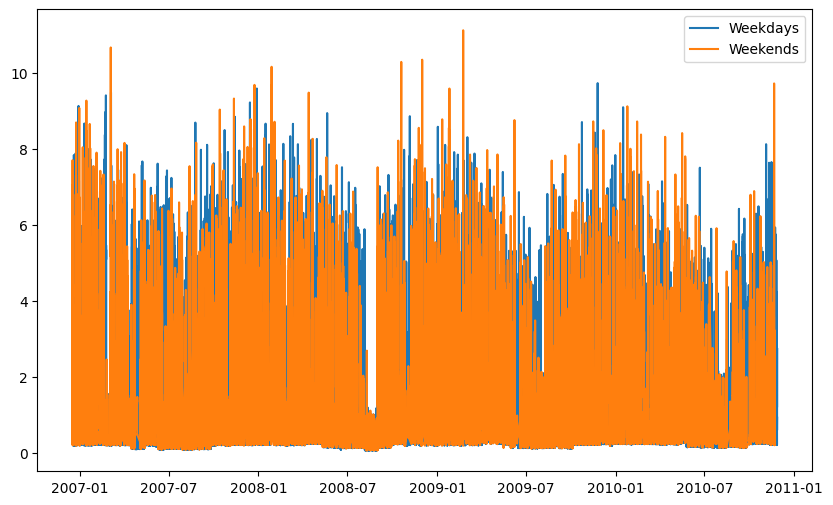


Processing Query 4 on model llama-3.1-8b-instant 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Resample df to daily frequency and sum Global_active_power for each day
daily_sum = df.resample('D').agg({'Global_active_power': 'sum'})

# Create a mask for daily sums exceeding 5 kWh
mask = daily_sum['Global_active_power'] > 5

# Find and print all dates where the daily sum exceeds 5 kWh, along with the corresponding values
print(daily_sum.loc[mask])

# Plot the daily sums
plt.figure(figsize=(10,6))
plt.plot(daily_sum.index, daily_sum['Global_active_power'])
plt.title('Daily Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kWh)')
plt.show()
            Global_active_power
datetime                       
2006-12-16             1209.176
2006-12-17             3390.460
2006-12-18             2203.826
2006-12-19             1666.194
2006-12-20             2225.748
...                         ...
2010-11-22             2041.536
2010-11-23     

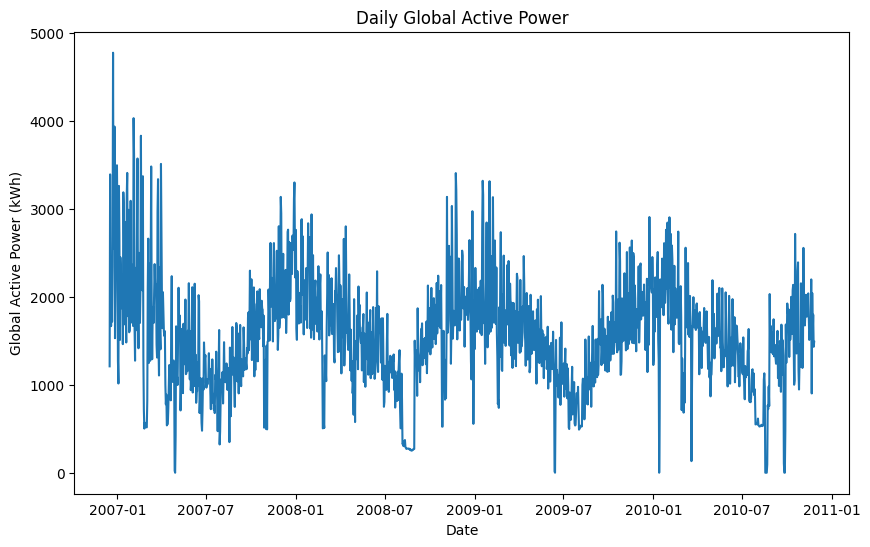


Processing Query 5 on model llama-3.1-8b-instant 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the specified period
mask = (df.index >= '2007-01-01') & (df.index <= '2007-01-07')
df_filtered = df.loc[mask]

# Plot Global_active_power over time
plt.figure(figsize=(12,6))
plt.plot(df_filtered.index, df_filtered['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('Global Active Power over Time (Jan 1-7, 2007)')
plt.grid(True)
plt.show()


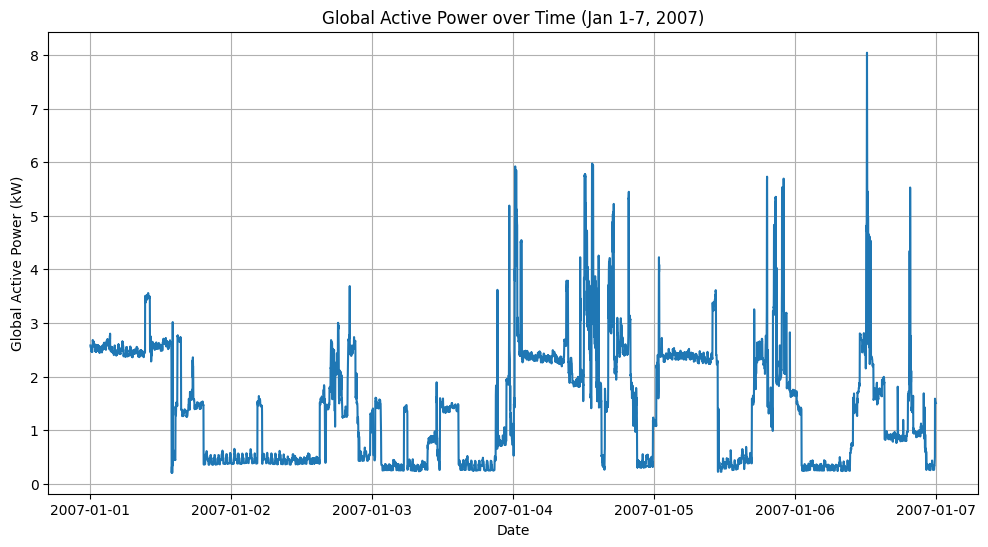


Processing Query 6 on model llama-3.1-8b-instant 
Generated code:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame by date
mask = (df.index >= '2007-02-01') & (df.index <= '2007-02-07')
df_filtered = df.loc[mask]

# Aggregate by day and calculate the average Voltage
average_voltage = df_filtered.resample('D').agg({'Voltage': 'mean'})

# Print the result
print(average_voltage)
plt.show()
               Voltage
datetime              
2007-02-01  240.392139
2007-02-02  240.334389
2007-02-03  238.910194
2007-02-04  239.633333
2007-02-05  240.810312
2007-02-06  241.264160
2007-02-07  243.530000

Processing Query 7 on model llama-3.1-8b-instant 
Generated code:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr(numeric_only=True)

# Print correlation matrix
print(corr_matrix)

# Plot heatmap of correlation matri

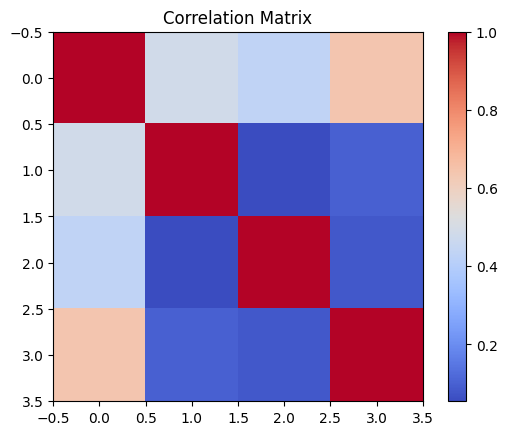



 Testing Model: llama3-70b-8192 

Processing Query 1 on model llama3-70b-8192 
Generated code:
 mask = (df.index.year'] == 2007) & (df.index.month == 3)
print(df.loc[mask, 'Global_active_power'])
Execution Error: unterminated string literal (detected at line 1) (<string>, line 1)

Processing Query 2 on model llama3-70b-8192 
Generated code:
 mask = (df.index.year' == 2006) & (df.index.month == 12) & (df.index.day == 25)
hour_max = df.loc[mask].groupby(df.index.hour)['Global_active_power'].sum().idxmax()
print(hour_max)
Execution Error: unterminated string literal (detected at line 1) (<string>, line 1)

Processing Query 3 on model llama3-70b-8192 
Generated code:
 df['is_weekend'] = df.index.dayofweek >= 5
weekend_power = df.loc[df['is_weekend']].Global_active_power.mean()
weekday_power = df.loc[~df['is_weekend']]].Global_active_power").mean()
print(f"Weekend mean Global_active_power: {weekend_power:.2f}")
print(f"Weekday mean Global_active_power: {weekday_power:.2f}")
Execution Erro

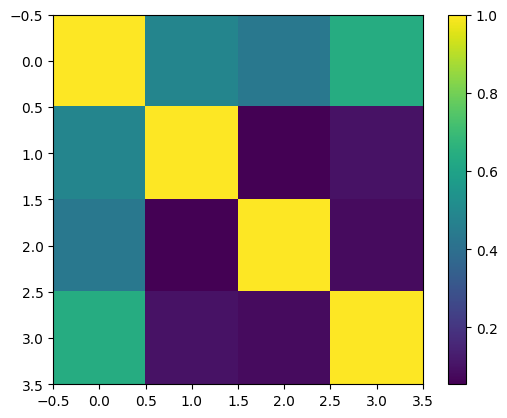



 Final Evaluation Report

 Results for Model: gemma2-9b-it 
Query  | Status               | Details
------------------------------------------------------------
1      | Success              | 
2      | Error                | Grouper and axis must be same length
3      | Success              | 
4      | Error                | Cannot index with multidimensional key
5      | Success (plot)       | 
6      | Success              | 
7      | Success              | 

 Results for Model: meta-llama/llama-guard-4-12b 
Query  | Status               | Details
------------------------------------------------------------
1      | Error                | name 'unsafe' is not defined
2      | Error                | name 'unsafe' is not defined
3      | Error                | name 'unsafe' is not defined
4      | Error                | name 'unsafe' is not defined
5      | Error                | name 'safe' is not defined
6      | Error                | name 'unsafe' is not defined
7      | Error  

In [9]:
# Script Over Multiple Models
RECOMMENDED_MODELS = [
    "gemma2-9b-it",
    "meta-llama/llama-guard-4-12b",
    "llama-3.3-70b-versatile",
    "llama-3.1-8b-instant",
    "llama3-70b-8192",
    "llama3-8b-8192"
]

def evaluate_model(model_id):
    df = load_data()
    results = [] # Add client initialization here
    for idx, query in enumerate(QUERIES, 1):
        print(f"\nProcessing Query {idx} on model {model_id} ")
        full_prompt = f"{DATA_CONTEXT}\n\nNow, answer this query:\n{query}"
        try:
            response = client.chat.completions.create(
                model=model_id,
                messages=[{"role": "user", "content": full_prompt}],
                temperature=0.2
            )
            # Corrected response access
            code = clean_code(response.choices[0].message.content)
            print("Generated code:\n", code)
            exec_globals = {'df': df, 'plt': plt, '__builtins__': __builtins__}
            exec_locals = {}
            try:
                exec(code, exec_globals, exec_locals)
                if idx == 5:
                    plt.show()
                    results.append((idx, "Success (plot)", None))
                else:
                    results.append((idx, "Success", None))
            except Exception as e:
                results.append((idx, "Error", str(e)))
                print(f"Execution Error: {e}")
        except Exception as e:
            results.append((idx, "Error (LLM)", str(e)))
            print(f"LLM Error: {e}")
    return results

# Compiling results (corrected variable name)
all_results = {}
for model in RECOMMENDED_MODELS:  # Changed to RECOMMENDED_MODELS
    print(f"\n\n Testing Model: {model} ")
    try:
        model_results = evaluate_model(model)
        all_results[model] = model_results
    except Exception as e:
        print(f"Model {model} failed: {str(e)}")

# Cumulated Report
print("\n\n Final Evaluation Report")
for model, results in all_results.items():
    print(f"\n Results for Model: {model} ")
    print(f"{'Query':<6} | {'Status':<20} | {'Details'}")
    print("-" * 60)
    for idx, status, error in results:
        print(f"{idx:<6} | {status:<20} | {error or ''}")
